While watching the Lectures from Fastai this time around, Jeremy used a Python Decorator called `@interact` which creates a function with interactable variables. This is really useful feature when you want to experiment with specific values - like Jeremy did in the lecture. However, there is a warning in the Lecture notes:
> Reminder: If the sliders above aren't working for you, that's because the interactive features of this notebook don't work in Kaggle's Reader mode. They only work in Edit mode. Please click "Copy & Edit" in the top right of this window, then in the menu click Run and then Run all. Then you'll be able to use all the interactive sliders in this notebook.

Let's step that back a little bit for an explanation since some of this might not be familiar. Python **Decorators** are function annotations which modify the behavior of their function. There are excellent articles and descriptions about them but we'll use this one from the Python Docs as an example: `@cache` from the `functools` library.

In [3]:
from functools import cache
@cache
def factorial(n):
    return n * factorial(n-1) if n else 1

In [4]:
factorial(10)      # no previously cached result, makes 11 recursive calls

3628800

In [5]:
factorial(5)       # just looks up cached value result

120

In [6]:
factorial(12)      # makes two new recursive calls, the other 10 are cached

479001600

The *Decorator* `@cache` will modify the behavior of the function to record previous computations. In this way, you can save time using the modified function we've written. In the instance with Jeremy, the `@interact` call modifies the function written to allow us to modify the values in real time without ending execution nor updating the values in the code block. What we're really after here though is **Does this work with Fastpages**?

Considering the warning given by Jeremy, I wouldn't expect this to work but I've gotten `R` working in these Jupyter Notebooks and uploaded them so let's try it.
First, we'll need the imports to do this and then we'll simply use the example from the [Fastai Lecture Notebook](https://github.com/fastai/course22/blob/master/04-how-does-a-neural-net-really-work.ipynb) and then push it to the site.

In [11]:
from ipywidgets import interact
import torch
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

plt.rc('figure', dpi=90) # This modifies the size of the graphs

In [8]:
# This is just from the notebook
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

# Define a quadratic function:
def f(x): return 3*x**2 + 2*x + 1

# define generic quadratic
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)

def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

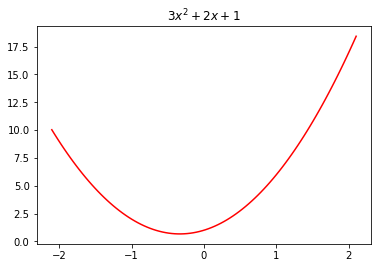

In [9]:
plot_function(f, "$3x^2 + 2x + 1$")

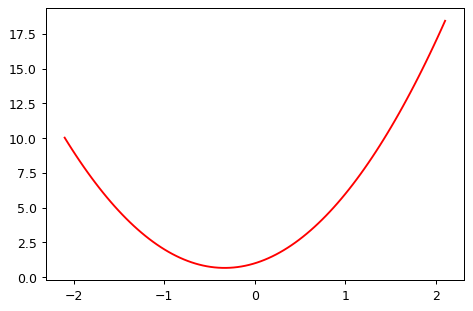

In [12]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [13]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

In [14]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

# Conclusion

After pushing the page, it doesn't work. I assumed as much but was hopeful it would work.